In [234]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [235]:
## Download latest version
path = kagglehub.dataset_download("mdsultanulislamovi/student-stress-monitoring-datasets")

# Take a Quick Look at the Data Structure

In [236]:
data = pd.read_csv(path + "/StressLevelDataset.csv")
#data = pd.read_csv(path + "/Stress_Dataset.csv") tentei usar mas estava MUITO desbalanceado
data.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [237]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

In [238]:
data["stress_level"].unique()
# 0 --> No Stress
# 1 --> Normal/Moderate Stress
# 2 --> High Stress

array([1, 2, 0])

In [239]:
data["stress_level"].value_counts()

stress_level
0    373
2    369
1    358
Name: count, dtype: int64

In [240]:
data.describe()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,11.063636,17.777273,0.492727,12.555455,2.508182,2.181818,2.660000,2.753636,2.649091,2.518182,...,2.772727,2.772727,2.621818,2.648182,2.649091,1.881818,2.734545,2.767273,2.617273,0.996364
std,6.117558,8.944599,0.500175,7.727008,1.409356,0.833575,1.548383,1.400713,1.328127,1.119208,...,1.433761,1.414594,1.315781,1.384579,1.529375,1.047826,1.425265,1.417562,1.530958,0.821673
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,11.000000,0.000000,6.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000
50%,11.000000,19.000000,0.000000,12.000000,3.000000,2.000000,2.500000,3.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.500000,3.000000,1.000000
75%,16.000000,26.000000,1.000000,19.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,...,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.000000
max,21.000000,30.000000,1.000000,27.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,2.000000


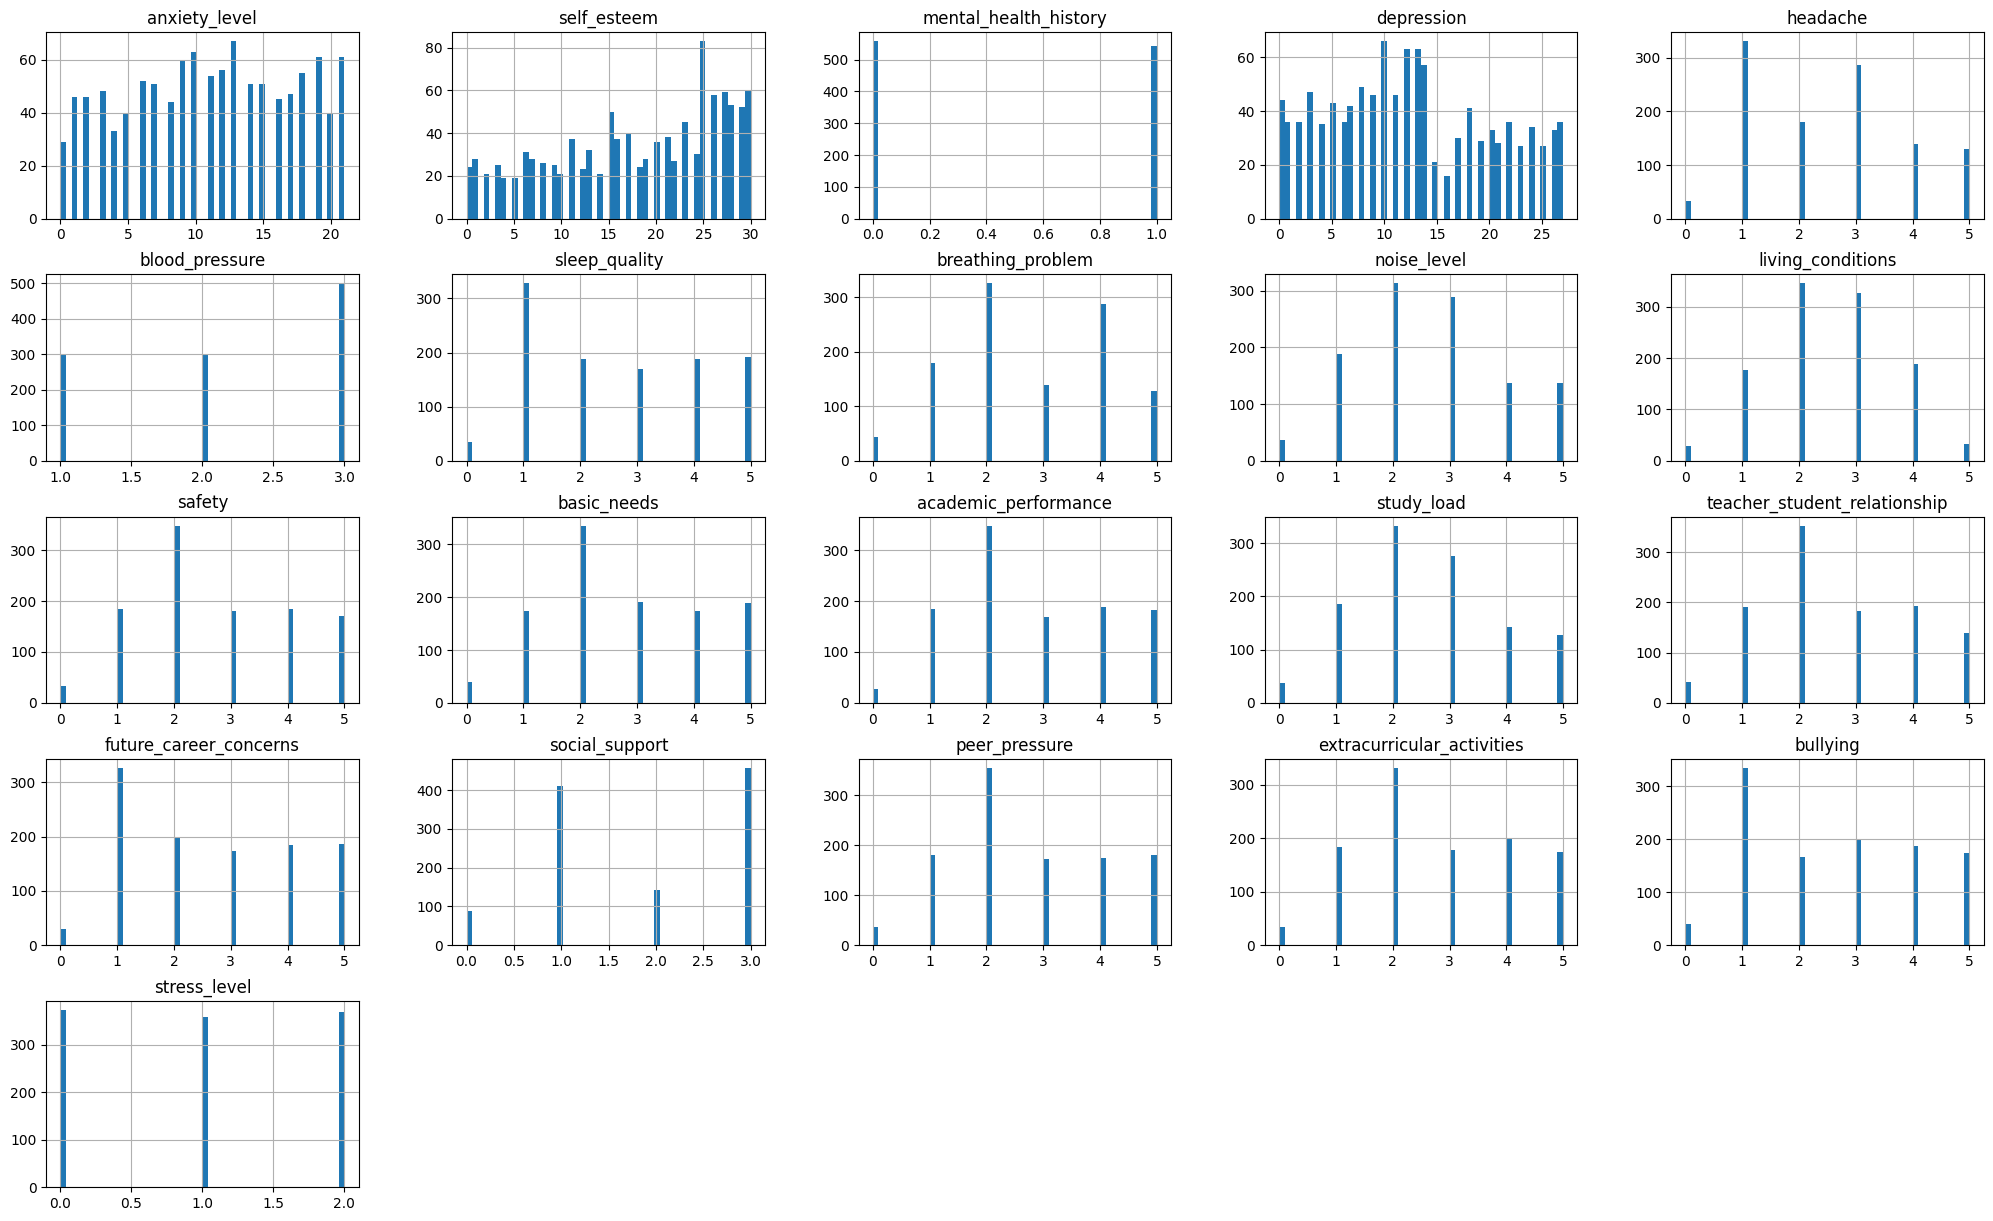

In [241]:
data.hist(bins = 50, figsize =(25,15))
plt.show()

In [242]:
data.isnull().sum()

anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64

# Create a Test Set

In [243]:
from sklearn.model_selection import train_test_split

x = data.drop("stress_level", axis=1)
y = data["stress_level"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
## -----
print("Distribuição no treino:", y_train.value_counts(normalize=True))
print("Distribuição no teste:", y_test.value_counts(normalize=True))



Distribuição no treino: stress_level
0    0.339773
2    0.335227
1    0.325000
Name: proportion, dtype: float64
Distribuição no teste: stress_level
0    0.336364
2    0.336364
1    0.327273
Name: proportion, dtype: float64


In [244]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


# Select and Train a Model

In [245]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

modelos = {
    "LR": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "DT": DecisionTreeClassifier(class_weight='balanced'),
    "RF": RandomForestClassifier(random_state=42, class_weight='balanced'),
    "SVM": SVC(random_state=42, class_weight='balanced'),
    "RNA": MLPClassifier(max_iter=1000, random_state=42),
    "kNN": KNeighborsClassifier()
}
    # LR - Regressão Logística
    # DT - Árvore de Decisão
    # RF - Random Forest
    # SVM - Support Vector Machine
    # RNA - Redes Neurais
    # kNN - k-Nearest Neighbors

In [246]:
metricas = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}

In [247]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

for nome, modelo in modelos.items():

    modelo.fit(x_train, y_train)
    y_pred = modelo.predict(x_test)

    metricas['Accuracy'].append(accuracy_score(y_test, y_pred))
    metricas['Precision'].append(precision_score(y_test, y_pred, average='weighted'))
    metricas['Recall'].append(recall_score(y_test, y_pred, average='weighted'))
    metricas['F1-Score'].append(f1_score(y_test, y_pred, average='weighted'))


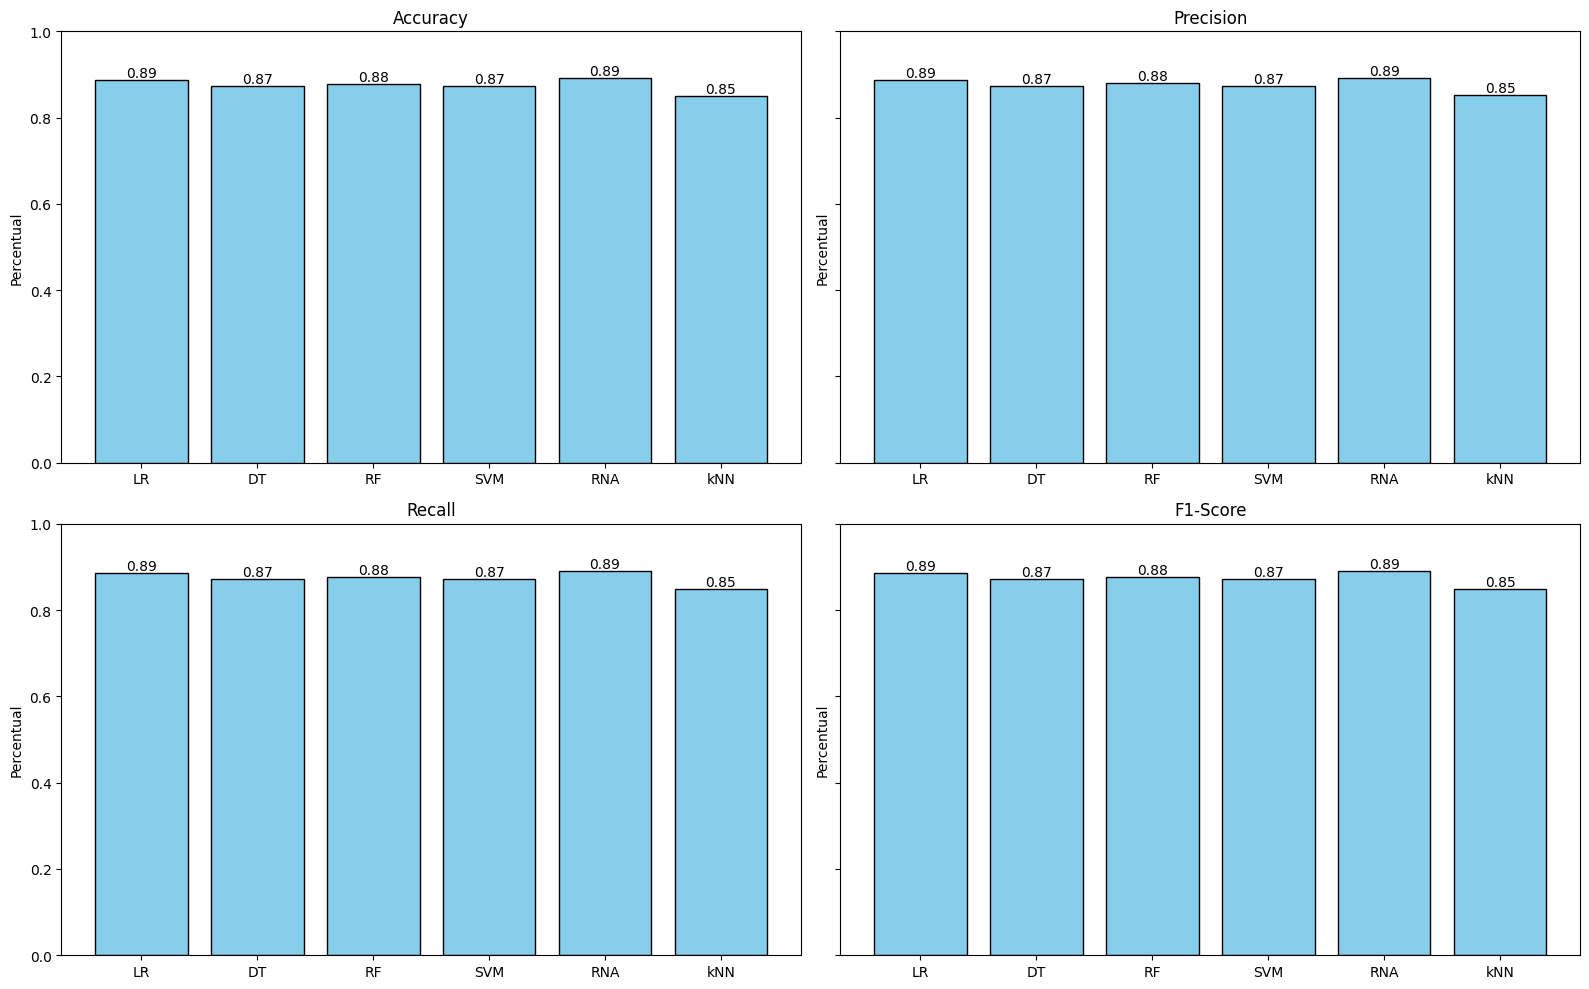

In [248]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharey=True)

for i, (metrica, valores) in enumerate(metricas.items()):
    ax=axes[i // 2, i % 2]
    bars = ax.bar(modelos.keys(), valores, color='skyblue', edgecolor='black')
    
    ax.bar_label(bars, fmt="%.2f")
    
    ax.set_title(metrica)
    ax.set_ylabel('Percentual')
    ax.set_ylim(0, 1)

plt.tight_layout()
plt.show()
